In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv("../data/diabetes_full.csv")
df = df.sample(frac=0.7)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
13355,53226024,97258563,Hispanic,Female,[40-50),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,<30
65170,181614738,84397842,Caucasian,Male,[60-70),?,1,1,7,8,...,No,No,No,No,No,No,No,Ch,Yes,>30
71881,209290380,111341538,Caucasian,Female,[70-80),?,2,3,1,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
78539,240081468,58161186,AfricanAmerican,Male,[70-80),?,1,3,7,8,...,No,Down,No,No,No,No,No,Ch,Yes,<30
37556,116534388,13313934,Caucasian,Male,[50-60),?,1,6,7,8,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [28]:
df.shape

(71236, 50)

### Convert the target column to categorical

In [29]:
df['readmitted'].head(10)

13355    <30
65170    >30
71881     NO
78539    <30
37556     NO
31711     NO
28599     NO
74289     NO
61071     NO
98320    <30
Name: readmitted, dtype: object

In [30]:
df['readmitted'] = df['readmitted'].astype('category')
df['readmitted'] = df['readmitted'].cat.codes
df['readmitted'].head(10)

13355    0
65170    1
71881    2
78539    0
37556    2
31711    2
28599    2
74289    2
61071    2
98320    0
Name: readmitted, dtype: int8

In [31]:
readmitted_counts = df['readmitted'].value_counts(normalize=True)
readmitted_counts

2    0.538057
1    0.349276
0    0.112668
Name: readmitted, dtype: float64

([<matplotlib.patches.Wedge at 0x18b9169b080>,
 [Text(-0.131201,1.09215,'Not re-admitted'),
  Text(-0.255483,-1.06992,'Re-admitted after 1 month'),
  Text(1.03181,-0.381272,'Re-admitted before 1 month')])

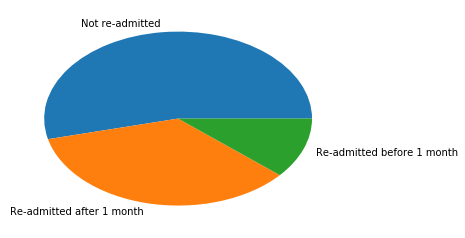

In [32]:
plt.pie(readmitted_counts, labels=["Not re-admitted", "Re-admitted after 1 month", "Re-admitted before 1 month"])